In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.io import wavfile
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio 
import math
import scipy

## <font color='red'> 1. Let Y is true and X is observed random variables. Estimate $\hat{Y}$ as constant $b$. Verify $b=E[Y]$ give minimum MMSE.<font>

MMSE between Y and YE 0.08251397427699432


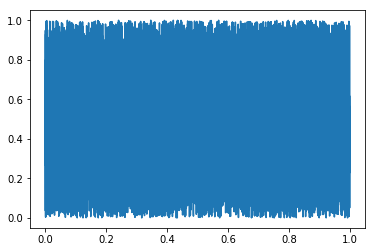

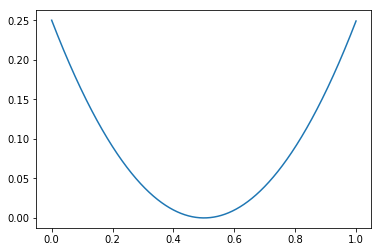

In [35]:
Y = np.random.uniform(0,1,10000)
y = np.linspace(np.min(Y),np.max(Y),10000)

plt.figure()
plt.plot(y,Y)

YE = np.mean(Y)
print("MMSE between Y and YE",np.mean((Y-YE)**2))#"""
plt.figure()
plt.plot(y,(y-YE)**2)

## Y>>>>> channel/Model >>>>> X 
## <font color='red'> 2.1 Generating correlated two random variables.Consider one variable as true and another as observed. Find the linear MMSE estimate of X given Y. <font>
Hint: $$Y=AX$$ $$C_Y=AC_XA^T$$ Digonalize $$C_Y=U\Sigma U^{-1}$$ So, $$U\Sigma^{\frac{1}{2}}\Sigma^{\frac{1}{2}} U^{-1}=AC_XA^T$$ If, $X$ is uncorrelated then $C_X$ must be identity

Hint for Code: Use np.linalg.eig,np.diag,np.matmul,np.cov

In [80]:
def corrrv(n_samp,correlation):
    x1 = np.random.randn(n_samp)
    x2 = np.random.randn(n_samp)
    X = np.concatenate((np.array([x1]),np.array([x2])),axis=0)
    Cx = np.cov(X)
    cr = correlation # correlation 
    Cy = np.array([[1 , cr ],
                   [cr , 1 ]])
    
    e,u = np.linalg.eig(Cy)
    d = np.diag(e)
    d = scipy.linalg.sqrtm(d)
    a = np.matmul(u,d)
    Y = np.matmul(a,X)
    
    #write code here
    X = Y[0,:]
    Y = Y[1,:]
    return Y,X

In [81]:
Y,X = corrrv(10000,0.6)
print(np.cov(Y,X))

[[0.97467219 0.5819816 ]
 [0.5819816  0.98009072]]


## <font color='red'> 2.2 Consider one variable as true and another as observed. Find the linear MMSE estimate of X given Y. <font>
Hint : Let Y=Y[0,:] and X= Y[1,:] 
 $$\hat{Y}=aX+b$$
 $$a = \frac{COV(X,Y)}{VAR(X)}$$
 $$b = E[Y-aX]$$

In [82]:
def LMMSEP(Y,X):
    c = (np.cov(Y,X))
    a=c[0,1]/c[0,0]
    #print(c/v)
    b = np.mean(Y-a*X)
    return a,b

In [83]:
a,b = LMMSEP(Y,X)
YE = a*X+b
print("MMSE between Y and YE",np.mean((Y-YE)**2))
print("MMSE between Y and X",np.mean((Y-X)**2))

MMSE between Y and YE 0.6290370672592122
MMSE between Y and X 0.790723337953278


## <font color='red'> 2.3 Generate another set of correlated random variable with same correlation. Estimate $\hat{Y}$ using already estimated parameters.<font>
    

In [87]:
Y,X = corrrv(10000,0.6)
a,b = LMMSEP(Y,X)
YE = a*X+b
print("MMSE between Y and YE",np.mean((Y-YE)**2))
print("MMSE between Y and X",np.mean((Y-X)**2))

MMSE between Y and YE 0.6435091256101099
MMSE between Y and X 0.8033837487211299


## <font color='red'> 3. Repeate 2.1 and 2.2 for different random variables with different values of correlations.<font>

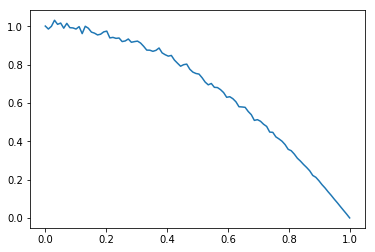

In [86]:
crr = np.linspace(0,1,100)
MMSE = np.zeros(shape=(100,1))
for i in range(100):
    Y,X = corrrv(10000,crr[i])
    a,b = LMMSEP(Y,X)
    YE = a*X+b
    MMSE[i] = np.mean((Y-YE)**2)
plt.plot(crr,MMSE)